# Clustering

In [0]:
import pandas as pd
df = pd.read_csv("Hotels_Good_Data.csv",parse_dates=[1,2])
df = df.drop(['Unnamed: 0','Snapshot Date','Day Diff','WeekDay','Discount Diff','Discount Perc'],axis=1)
df.head()

,Checkin Date,Discount Price,Discount Code,Hotel Name
0,2015-07-18,7.150701,1,Newark Liberty International Airport Marriott
1,2015-07-18,6.244167,2,Howard Johnson Inn Queens
2,2015-07-18,7.126891,2,Home2 Suites by Hilton NY Long Island City Man...
3,2015-07-18,8.188689,2,Park Hyatt New York
4,2015-07-18,6.502790,2,Ramada Staten Island


### 150 Hotels with highest number of records

In [0]:
num = df.groupby('Hotel Name').size().nlargest(150).sum()
df['count'] = df.groupby('Hotel Name')['Hotel Name'].transform(len)
hotels_df = df.sort_values('count',ascending=False)[:num]
hotels_df.groupby('Hotel Name').size()

Hotel Name
Aloft Harlem                                                   209
Andaz 5th Avenue - a concept by Hyatt                         1309
Andaz Wall Street - a concept by Hyatt                         853
Baccarat Hotel and Residences New York                         200
Bentley Hotel                                                  280
Best Western Bayside Inn                                       414
Best Western Bowery Hanbee Hotel                               232
Best Western Plus Arena Hotel                                  284
Best Western Plus Newark Airport West                          287
Blakely New York                                               188
Cassa Hotel 45th Street                                       1797
Chelsea Inn                                                    191
Comfort Inn Times Square South Area                            533
Conrad New York                                               2624
Courtyard New York Manhattan Times Square West     

### 40 Checkin Dates with highest number of records

In [0]:
num=hotels_df.groupby('Checkin Date').size().nlargest(40).sum()
hotels_df['count'] = hotels_df.groupby('Checkin Date')['Checkin Date'].transform(len)
dates_df = hotels_df.sort_values('count',ascending=False)[:num]
dates_df.groupby('Checkin Date').size()

Checkin Date
2015-08-12    1733
2015-08-13    1181
2015-08-19    1811
2015-08-26    1519
2015-08-27    1217
2015-08-28    1216
2015-09-09    1574
2015-09-10    1601
2015-09-11    1310
2015-09-16    1399
2015-09-17    1368
2015-09-18    1284
2015-09-30    1373
2015-10-01    1286
2015-10-02    1220
2015-10-07    1205
2015-10-14    1812
2015-10-15    1425
2015-10-16    1272
2015-10-21    1810
2015-10-22    1638
2015-10-27    1222
2015-10-28    1842
2015-10-29    1598
2015-10-30    1379
2015-11-03    1200
2015-11-04    1863
2015-11-05    1673
2015-11-06    1785
2015-11-07    1242
2015-11-10    1529
2015-11-11    2252
2015-11-12    1627
2015-11-13    1527
2015-11-18    1541
2015-11-21    1413
2015-11-25    1158
2015-11-26    1335
2015-11-27    1280
2015-11-28    1344
dtype: int64

 ### Adding -1 to the table for non existing  Hotel Name,Checkin Date & discount code.

In [0]:
group=dates_df.groupby(['Hotel Name','Checkin Date','Discount Code'])
group = dates_df.loc[group['Discount Price'].idxmin()]
hotels = hotels_df.groupby('Hotel Name').size().index
checkins = dates_df.groupby('Checkin Date').size().index
new_df=pd.DataFrame(columns=group.columns)
for hotel in hotels:
    for date in checkins:
        for code in range(1,5):
            d=group[(group['Hotel Name'] == hotel) & (group['Checkin Date']==date) & (group['Discount Code']==code)]
            if(d.empty):
                new_df = new_df.append([{'Hotel Name': hotel , 'Checkin Date': date , 'Discount Code': code , 'Discount Price':-1}],ignore_index=True)
            else:
                 new_df = new_df.append(d,ignore_index=True)
new_df.drop('count',axis=1,inplace=True)
new_df.head()

,Checkin Date,Discount Price,Discount Code,Hotel Name
0,2015-08-12,-1,1,Aloft Harlem
1,2015-08-12,-1,2,Aloft Harlem
2,2015-08-12,-1,3,Aloft Harlem
3,2015-08-12,-1,4,Aloft Harlem
4,2015-08-13,-1,1,Aloft Harlem


### Creating discount prices table for a given hotel, checkin date and discount code.

In [0]:
def change_range(OldValue,OldMax,OldMin,NewMax,NewMin):
    return (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin

In [0]:
# check if minnominus1 is empty befor take the min
group_hotel = new_df.groupby(['Hotel Name'])
array=[]
for i in range(1,161):
    array.append(i)
hotels_df=pd.DataFrame(columns=array)
for index in group_hotel.groups:
    norm_values=new_df.loc[group_hotel.groups[index]]
    minnominus1 = norm_values[norm_values['Discount Price']>=0]
    array = []
    if (len(minnominus1)!=0):
        maximum=max(norm_values['Discount Price'])
        #minnominus1 = norm_values[norm_values['Discount Price']>=0]
        minimum=min(minnominus1['Discount Price'])
        if (maximum==minimum):
            maximum=maximum+1
        norm_values['Discount Price']=change_range(minnominus1['Discount Price'],maximum,minimum,100,0)
        norm_values.fillna(-1,inplace=True)
        for x in norm_values['Discount Price'].values:
            array.append(x)
    else:
        for x in norm_values['Discount Price'].values:
            array.append(x)
    hotels_df.loc[index]=array

hotels_df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Aloft Harlem,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Andaz 5th Avenue - a concept by Hyatt,-1.000000,-1.000000,27.657946,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,...,61.923312,-1.000000,-1.000000,92.633339,55.721728,77.305826,97.386421,60.753996,84.423294,100.000000
Andaz Wall Street - a concept by Hyatt,32.914338,30.004924,32.195057,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,15.122295,11.622034,73.457579,41.090946,33.343382,59.156419,57.163375,47.098879,-1.000000,-1.000000
Baccarat Hotel and Residences New York,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,88.093006,88.093006,40.148715,-1.000000,-1.000000,-1.000000,-1.000000
Bentley Hotel,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,19.471394,-1.000000
Best Western Bayside Inn,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,73.521876,-1.000000,20.468351,47.845295,69.379764,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Best Western Bowery Hanbee Hotel,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,26.669113,20.382691
Best Western Plus Arena Hotel,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,58.265226,-1.000000,-1.000000,37.236176,0.000000,-1.000000,-1.000000
Best Western Plus Newark Airport West,63.481426,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,9.949645,22.368264,-1.000000,-1.000000,-1.000000,20.326669,-1.000000,-1.000000
Blakely New York,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


<blockquote>
    <p>
    The table contains discount prices for a given hotel, discount code and a checkin date.
    The prices are normalized between 0 to 100 and where the data is absence we marked it as -1.
    </p>
</blockquote>

## Clustering Algoritem and Dendrogram

### Checking different distance methods

In [0]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#d(x,y) = min(dist(x[i],y[j]))
single = linkage(hotels_df)
single_grade, d = cophenet(single, pdist(hotels_df))

#Minimum deviation by centroids between two clusters centroids
ward = linkage(hotels_df, 'ward')
ward_grade, d = cophenet(ward, pdist(hotels_df))

#d(x,y) = max(dist(x[i],y[j]))
complete = linkage(hotels_df, 'complete')
complete_grade, d = cophenet(complete, pdist(hotels_df))

#d(x,y) = dist(center_x,center_y)/2
centroid = linkage(hotels_df, 'centroid')
centroid_grade, d = cophenet(centroid, pdist(hotels_df))

#d(x,y) = dist(median_x,median_y)/2
median = linkage(hotels_df, 'median')
median_grade, d = cophenet(median, pdist(hotels_df))

# average distance between clusters
average = linkage(hotels_df, 'average')
average_grade, d = cophenet(average, pdist(hotels_df))

#d(u,v) = (dist(s,v) + dist(t,v))/2
weighted = linkage(hotels_df, 'weighted')
weighted_grade, d = cophenet(weighted, pdist(hotels_df))

print('Single:' + str(single_grade))
print('Ward:' + str(ward_grade))
print('Complete:' + str(complete_grade))
print('Centroid:' + str(centroid_grade))
print('Median:' + str(median_grade))
print('Average:' + str(average_grade))
print('Weighted:' + str(weighted_grade))

Single:0.87202915038
Ward:0.547001657936
Complete:0.824423726362
Centroid:0.851065734983
Median:0.764410348896
Average:0.910277232995
Weighted:0.866484116683


<blockquote>
    <h4>Conclusions</h4>
    <p>
    We can see that the best performence are for the Average method, and the worst are for the Ward method.
        We believe that the reason for that is that the pricing policy for the given hotels is filled with outliers, and where the average method succeeds, the ward method, which relies on centroids of the clusters, fails.
    </p>
</blockquote>

### Dendogram

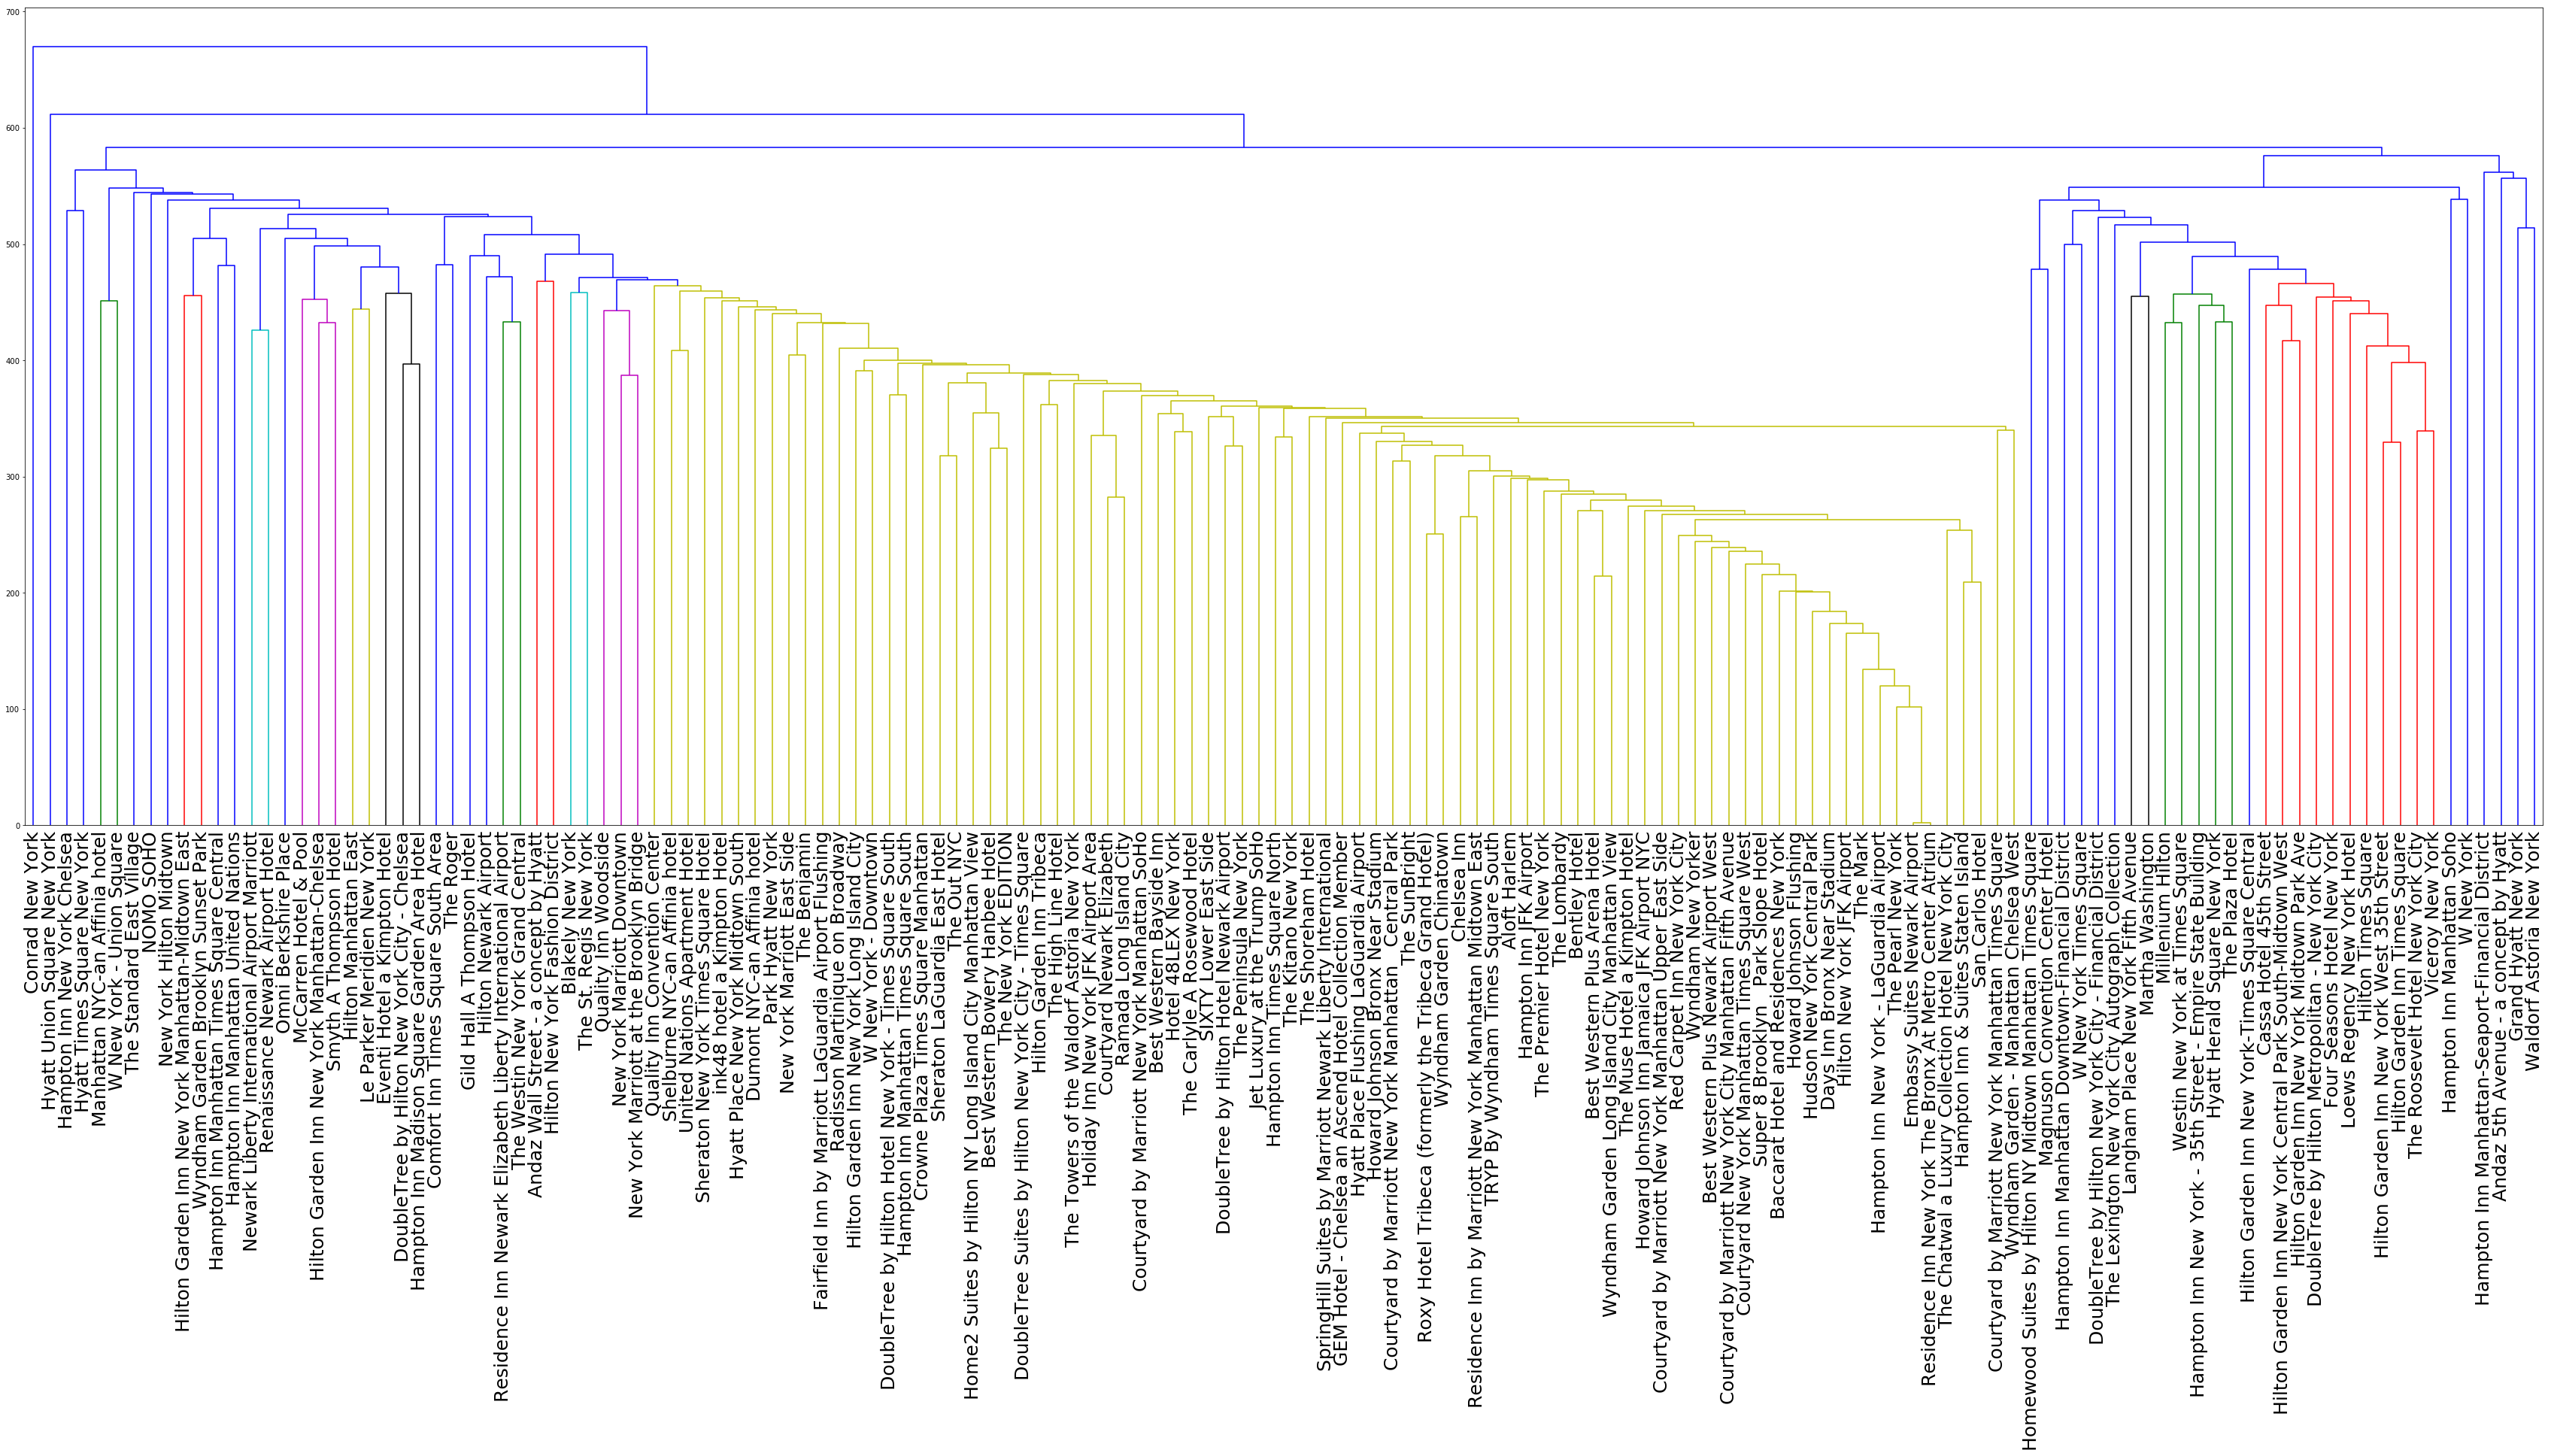

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
h=hierarchy.dendrogram(average,labels=hotels_df.index,leaf_font_size=25,leaf_rotation=90)
fig.set_size_inches(60, 20, forward=True)
plt.show()

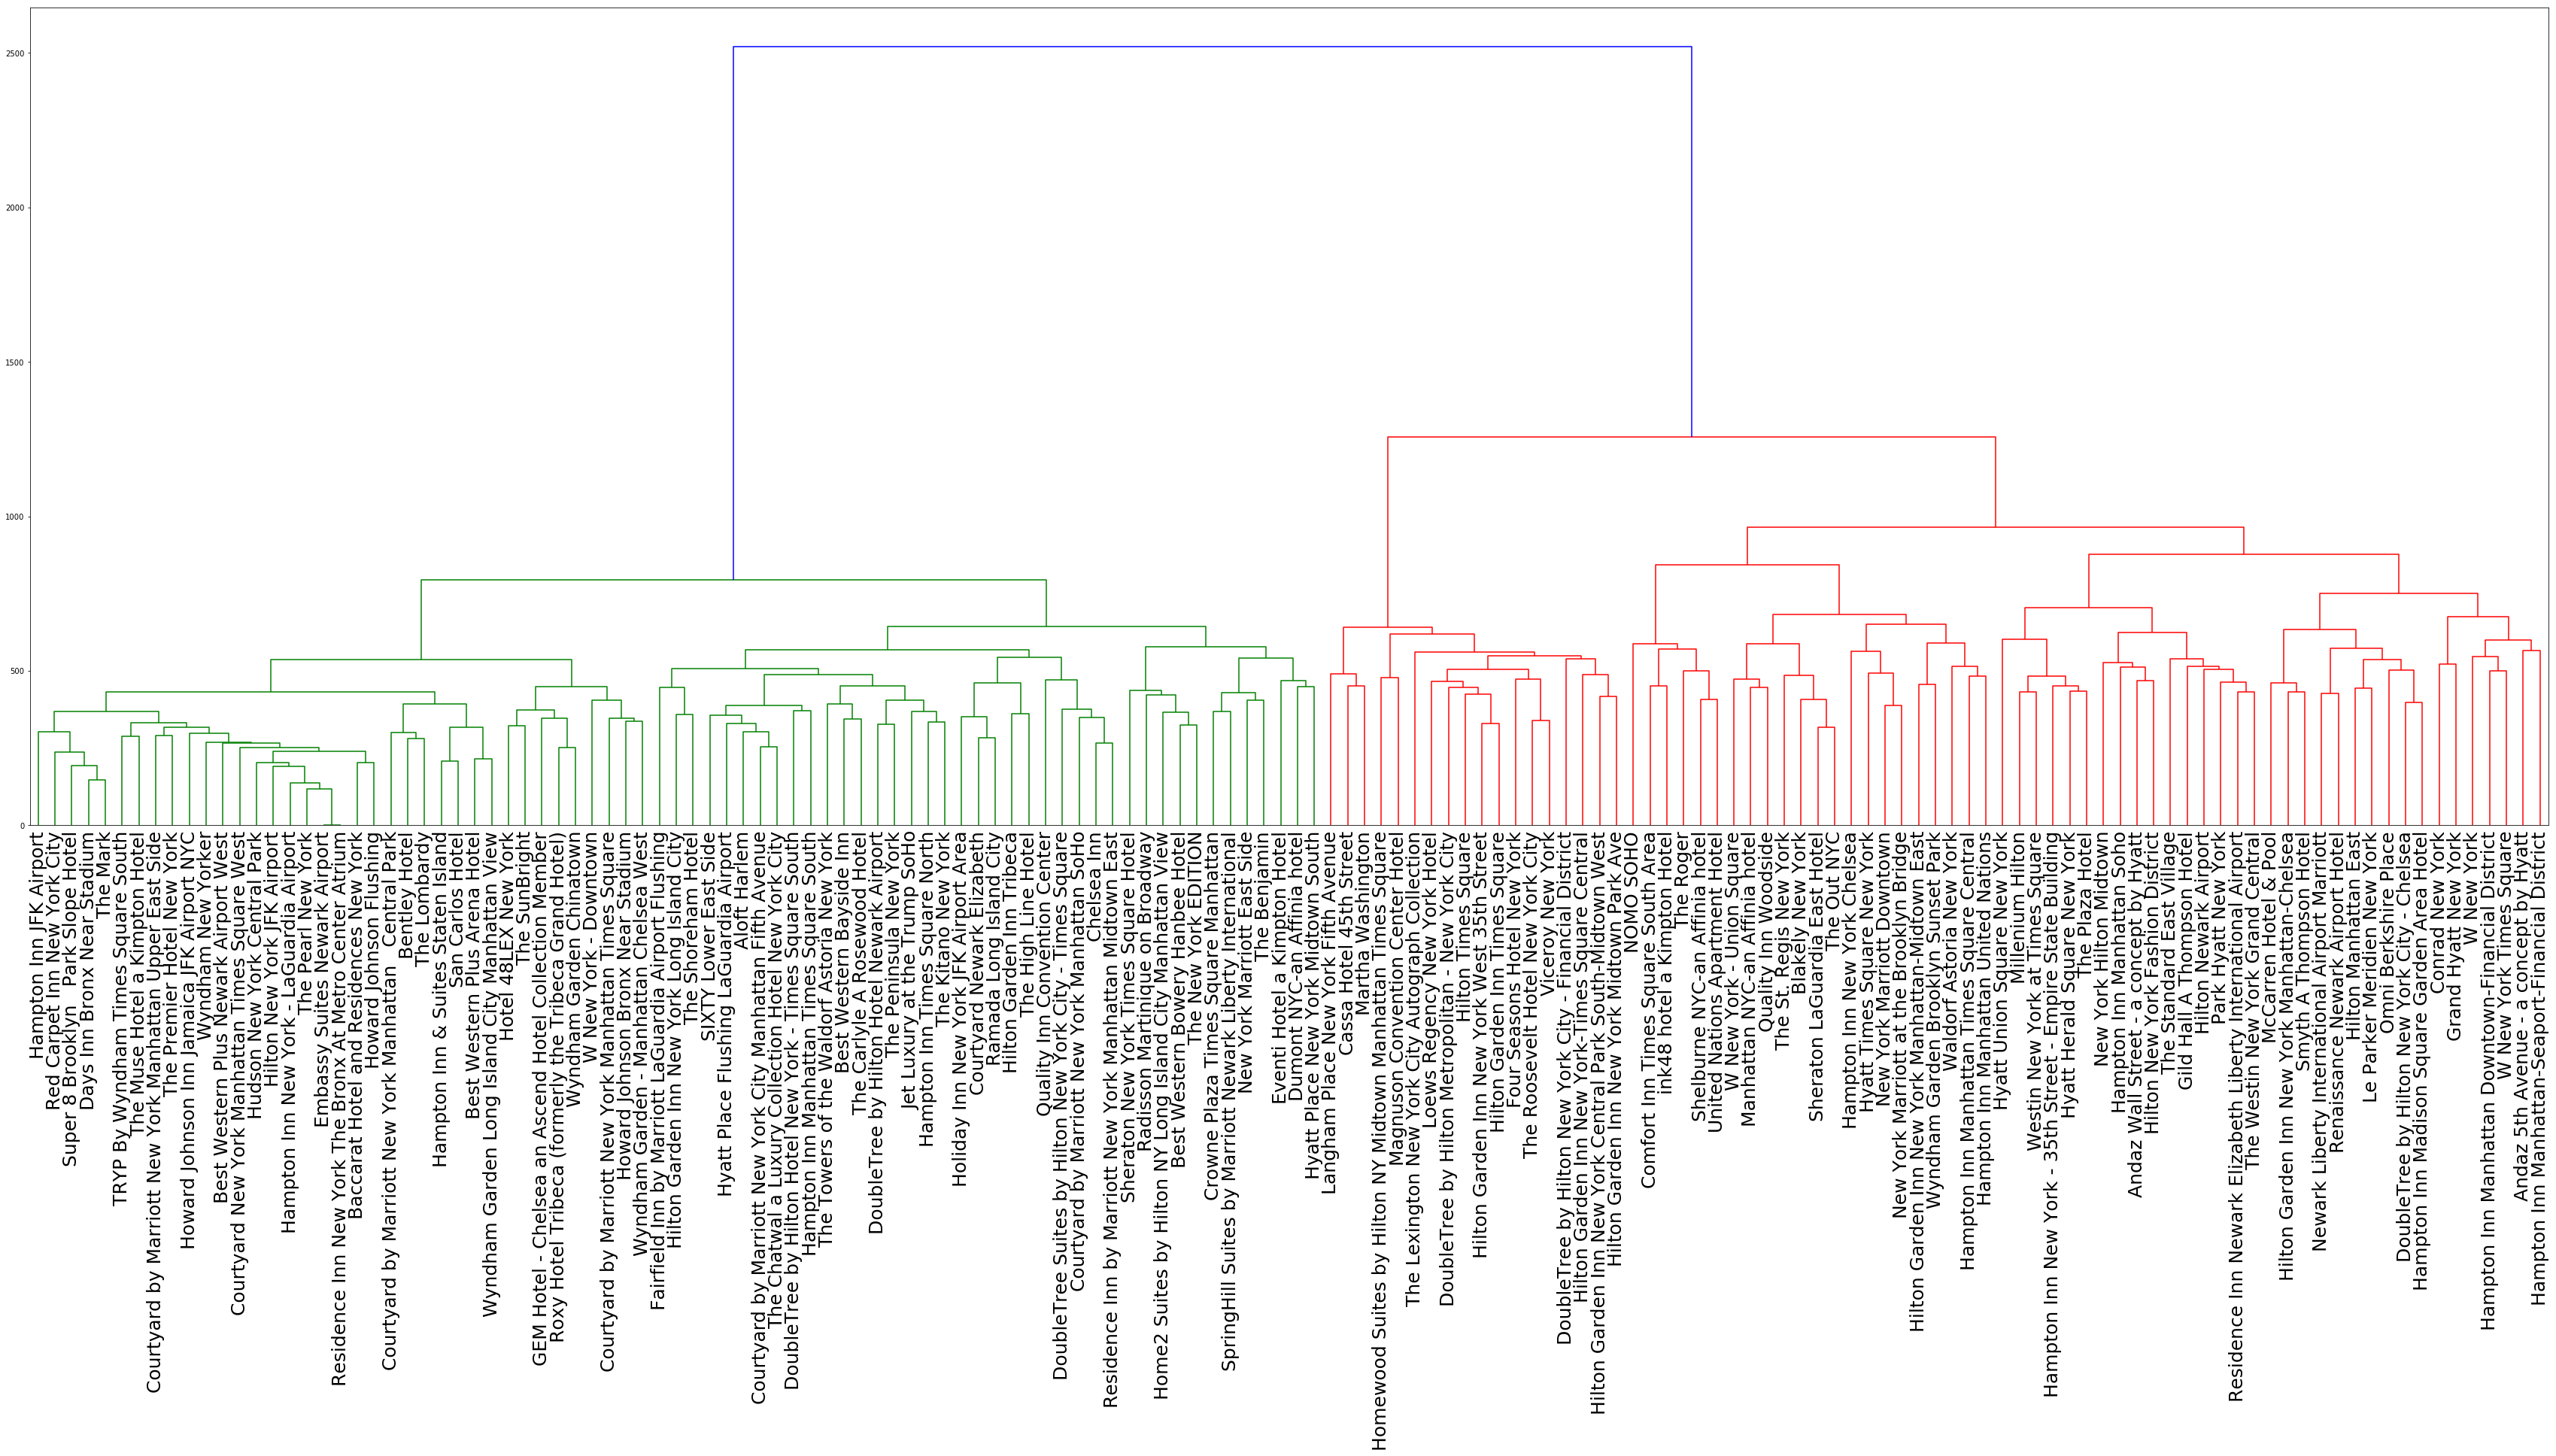

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
h=hierarchy.dendrogram(ward,labels=hotels_df.index,leaf_font_size=25,leaf_rotation=90)
fig.set_size_inches(60, 20, forward=True)
plt.show()

<blockquote>
    <h4>Dendrogram analysis</h4>
    <p>In the dendrogram above, the joined lines of the dendrogram indicates the order in which the clusters were joined.</p>
    <p>
    The heights of a splites reflect the distance between the clusters, for example we can see that hotel 'Embassy suits newark airport' and 'The perl new york' are most similar,as the height of the link that joins them together is the smallest.
    </p>
    <p>
    The dendrogram ,by ward distance method, shows us that are at least 2 clusters with a big difference between them, while The dendrogram ,by average distance method, shows us that are about 9 clusters with no big difference between them.
    </p>
    <p>
    Derived from the conclusions above we would have thought that there are two main pricing policies, but the ward ratings as we can see were low, so to conclude the average gave us better ratings so we can assume that there is for about 9 big different pricing policies.
    </p>
</blockquote>